<a href="https://colab.research.google.com/github/ReemLSHHSM/Diamon-price-prediction-/blob/main/Real.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
!git clone 

In [ ]:
# Importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#!pip install pandas-profiling==2.11.0
from pandas_profiling import ProfileReport

In [ ]:
# Reading train and test data files
train_data = pd.read_csv('/content/train.csv', index_col=[0])
test_data = pd.read_csv('/content/test.csv', index_col=[0])

# **Exploratory Data Analysis**

In [ ]:
# Creating statistical profile for the data frame
ProfileReport(train_data,minimal=True)

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Showing the top 5 rows in train data
train_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
Unnamed: 0,,,,,,,,,,
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


In [ ]:
# Counting duplicates
train_data.duplicated().sum()

127

In [ ]:
# Dropping duplicates
train_data.drop_duplicates(inplace=True)
test_data.drop_duplicates(inplace=True)


In [ ]:
# Showing data statistical description
train_data.describe()

,carat,depth,table,price,x,y,z
count,42913.000000,42913.000000,42913.000000,42913.000000,42913.000000,42913.000000,42913.000000
mean,0.796855,61.744490,57.440447,3943.509729,5.724621,5.728446,3.534453
std,0.480789,1.431742,2.239004,4022.173515,1.131302,1.158623,0.713821
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.380000,61.000000,56.000000,941.000000,4.660000,4.670000,2.870000
50%,0.710000,61.800000,57.000000,2392.000000,5.710000,5.720000,3.530000
75%,1.030000,62.500000,59.000000,5312.000000,6.500000,6.500000,4.020000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
# Showing feature details and nulls count
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42913 entries, 2 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    42913 non-null  float64
 1   cut      42913 non-null  object 
 2   color    42913 non-null  object 
 3   clarity  42913 non-null  object 
 4   depth    42913 non-null  float64
 5   table    42913 non-null  float64
 6   price    42913 non-null  int64  
 7   x        42913 non-null  float64
 8   y        42913 non-null  float64
 9   z        42913 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.6+ MB


In [ ]:
# Getting non-object data
non_obj = list(train_data.select_dtypes(exclude=['object']))
non_obj

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

In [ ]:
# Getting object data
obj = list(train_data.select_dtypes(include=['object']))
obj

['cut', 'color', 'clarity']

In [ ]:
# Getting cut categories
cuts = list(train_data.cut.unique())

In [ ]:
# Getting color categories
colors = list(train_data.color.unique())

In [ ]:
# Getting clarity categories
clarities = list(train_data.clarity.unique())

# **Visualization**

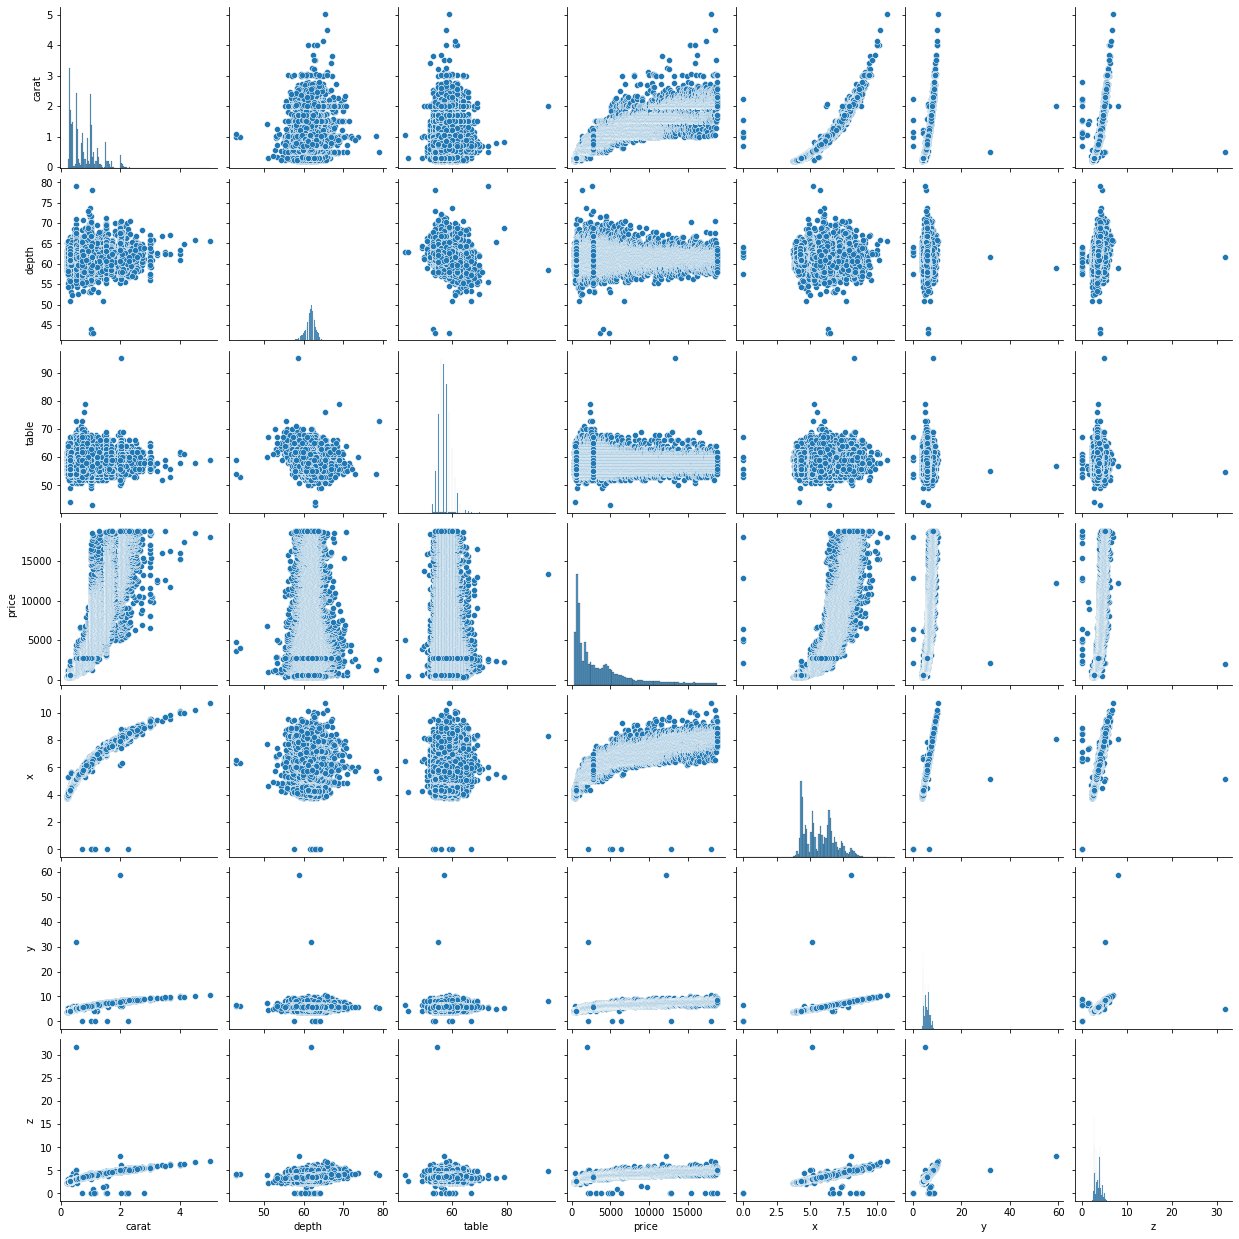

In [ ]:
sns.pairplot(train_data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fce65087650>,
      dtype=object)

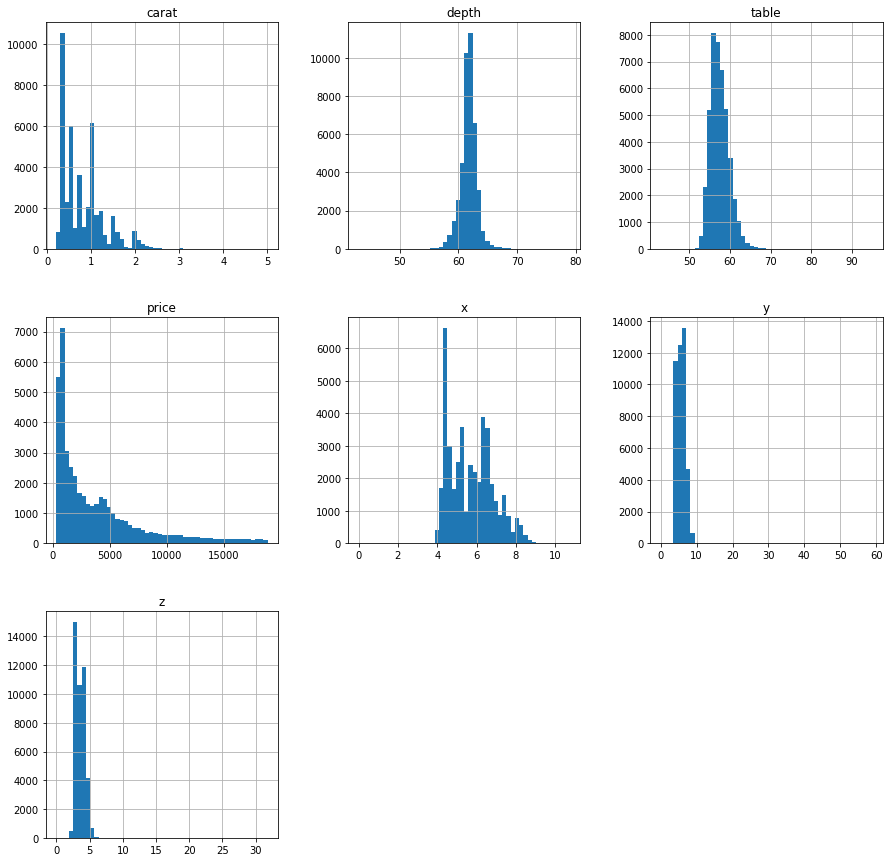

In [ ]:
train_data.hist(bins=50, figsize=(15,15))

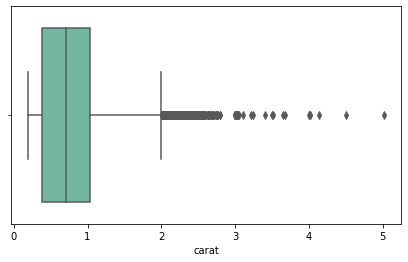

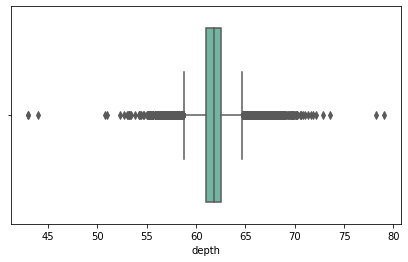

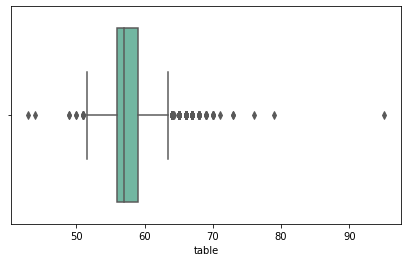

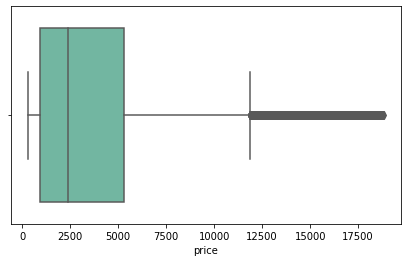

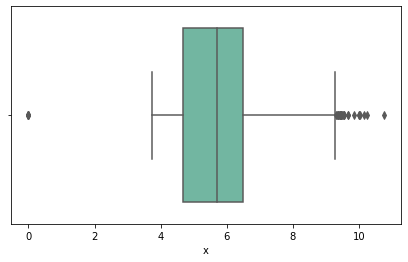

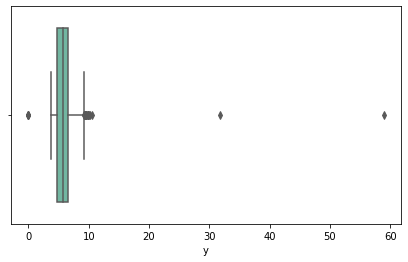

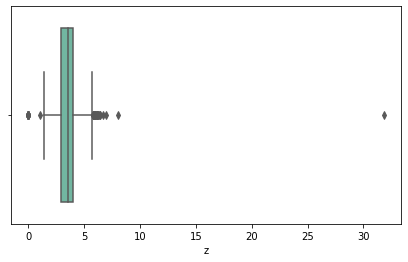

In [ ]:
for col in non_obj:
    plt.figure(figsize=(7,4))
    sns.boxplot(x=train_data[col],palette="Set2")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


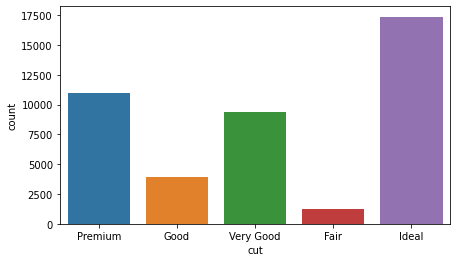

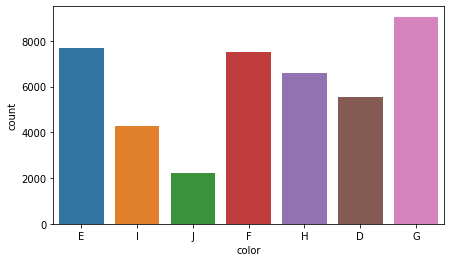

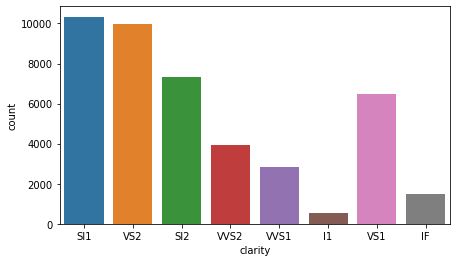

In [ ]:
# Visualizing counts of object features
for col in obj:
    plt.figure(figsize=(7,4))
    sns.countplot(train_data[col])

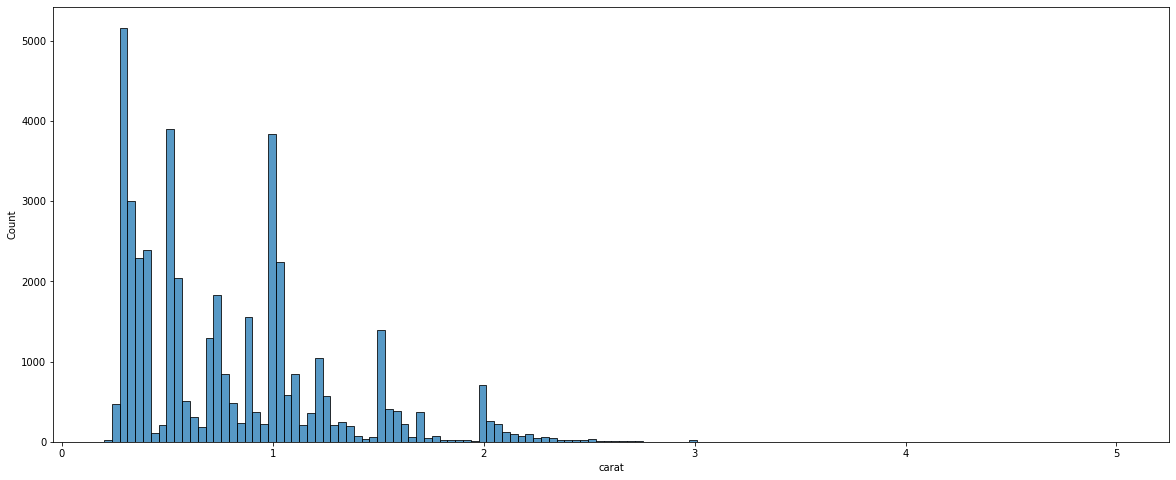

In [ ]:
# Visualizing carat values
plt.figure(figsize=(20,8))
sns.histplot(train_data['carat'])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


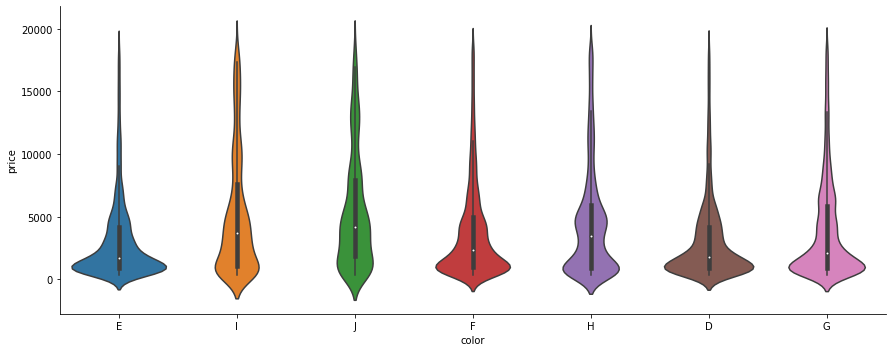

In [ ]:
# Visualizing distribution of color and price
sns.factorplot(x='color', y='price' , data=train_data , kind='violin', aspect=2.5)

Text(0.5, 1.0, 'Percentage of Clarity Categories')

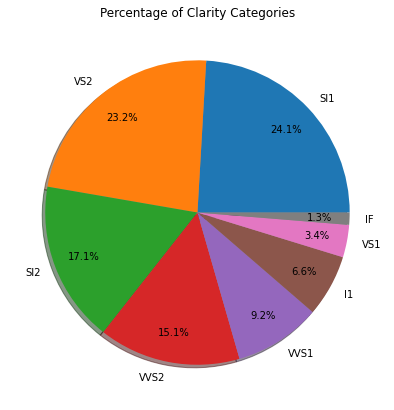

In [ ]:
# Visualizing percentages of clarity categories
labels = train_data.clarity.unique().tolist()
sizes = train_data.clarity.value_counts().tolist()
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, pctdistance=0.8)
plt.title("Percentage of Clarity Categories")

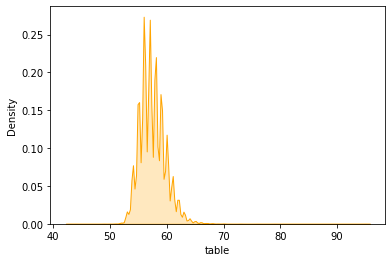

In [ ]:
# Drawing density of table feature
sns.kdeplot(train_data['table'] ,shade=True , color='orange')

(2.0, 10.0)

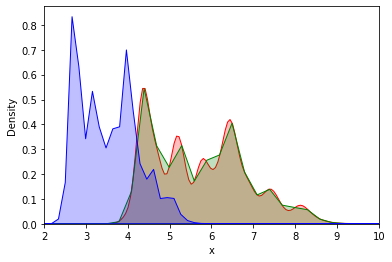

In [ ]:
# Drawing density of the three dimensions
sns.kdeplot(train_data['x'] ,shade=True , color='r' )
sns.kdeplot(train_data['y'] , shade=True , color='g' )
sns.kdeplot(train_data['z'] , shade= True , color='b')
plt.xlim(2,10)

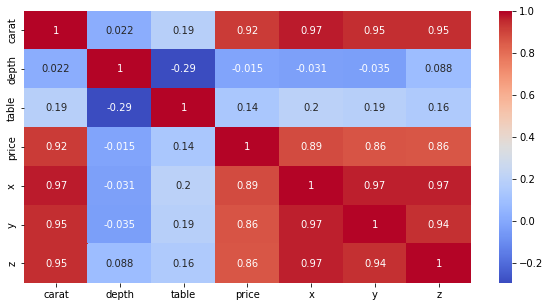

In [ ]:
# Visualizing correlations
plt.figure(figsize = (10,5))
sns.heatmap(train_data.corr(), annot=True , cmap='coolwarm')

**Observations:**
- Duplicates exist.
- The most common color of diamonds is G
- The least common color of diamonds is J
- The most common clarity of diamonds is SI1.
- The least common clarity of diamonds is I1.
- The most common cut of diamonds is Ideal.
- The least common cut of diamonds is Fair.
- 50% of diamonds have x-dimension between 4.66 and 6.5 mm.
- 50% of diamonds have y-dimension between 4.67 and 6.5 mm.
- 50% of diamonds have z-dimension between 2.87 and 4.02 mm.
- There is a strong correlation between the carat and x, y, and z dimensions.
- There is a strong correlation between the price and x, y, and z dimensions.
- There is a weak negative correlation between table and depth.
- There is no correlation between depth and x, y, and z dimensions of diamonds.
- There is no correlation between table and x, y, and z dimensions of diamonds.
- There is no correlation between depth and x, y, and carat.
- There is no correlation between table and x, y, and carat.




# **Data Cleaning & Transformation**

In [ ]:
# Counting zeros
(train_data == 0).sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          3
y          2
z          7
dtype: int64

In [ ]:
# Overwriting data frame to drop zeros in the 3 dimensions
train_data = train_data[(train_data['x'] > 0) & (train_data['y'] > 0) & (train_data['z'] > 0)]
test_data = test_data[(test_data['x'] > 0) & (test_data['y'] > 0) & (test_data['z'] > 0)]

In [ ]:
#new features
#train_data['volume']=train_data['x']*train_data['y']*train_data['z']
#test_data['volume']=test_data['x']*test_data['y']*test_data['z']

In [ ]:

#train_data["density"] = train_data["carat"]*0.2/train_data["volume"]
#test_data["density"] = test_data["carat"]*0.2/train_data["volume"]

In [ ]:
#train_data.drop(['x','y','z'],axis=1,inplace=True)
#test_data.drop(['x','y','z'],axis=1,inplace=True)

In [ ]:
# Removing labels from training data
train_labeled = train_data['price'].copy()
train_data = train_data.drop("price", axis=1)

In [ ]:
# Encoding categorical data
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
# Creating pipeline for numerical data
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  MinMaxScaler

num_pipeline = Pipeline([
        ('minmax_scaler',  MinMaxScaler())])

non_obj_arr = train_data.select_dtypes(exclude=['object'])
train_num_tr = num_pipeline.fit_transform(non_obj_arr)

In [ ]:
# Creating full pipeline including the encoder
from sklearn.compose import ColumnTransformer

ord_cut = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
ord_color = ['J','I','H','G','F','E','D']
ord_clarity = ['I1' , 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

cats=[ord_cut, ord_color, ord_clarity]
cols = ['cut','color','clarity']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, list(non_obj_arr)),
        ("cat", OrdinalEncoder(categories=cats), cols),
    ])
train_prepared = full_pipeline.fit_transform(train_data)

In [ ]:
# Checking train array shape
train_prepared.shape

(19268, 8)

In [ ]:
# Transforming test data
num_t_pipeline = Pipeline([
        ('minmax_scaler',  MinMaxScaler())])

test_non_obj_arr = test_data.select_dtypes(exclude=['object'])
test_num_tr = num_t_pipeline.fit_transform(test_non_obj_arr)

In [ ]:
# Creating full pipeline including the encoder
full_t_pipeline = ColumnTransformer([
        ("num_t", num_t_pipeline, list(test_non_obj_arr)),
        ("cat_t", OrdinalEncoder(categories=cats), cols),
    ])
test_prepared = full_t_pipeline.fit_transform(test_data)

# **Training**

In [ ]:
# Training a linear regression model
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet

reg = LinearRegression()
reg.fit(train_prepared, train_labeled)

LinearRegression()

In [ ]:
# Calculating mean squared error for the linear regression model
from sklearn.metrics import mean_squared_error

diamonds_predictions = reg.predict(train_prepared)
mse = mean_squared_error(train_labeled, diamonds_predictions)
rmse = np.sqrt(mse)
rmse

1224.4564959653924

In [ ]:
# Training a decision tree model
from sklearn.tree import DecisionTreeRegressor 

tree = DecisionTreeRegressor()
tree.fit(train_prepared, train_labeled)


DecisionTreeRegressor()

In [ ]:
# Calculating mean squared error for the decision tree model
diamonds_predictions = tree.predict(train_prepared)
tree_mse = mean_squared_error(train_labeled, diamonds_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

9.550703771663994

In [ ]:
# Using cross validation to evaluate the linear regression model
from sklearn.model_selection import cross_val_score

scores = cross_val_score(reg, train_prepared, train_labeled, scoring="neg_mean_squared_error", cv=10)
reg_rmse_scores = np.sqrt(-scores)

In [ ]:
# Displaying cross validation results for the linear regression model
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

display_scores(reg_rmse_scores)

Scores: [ 952.30188296  897.34112421 1078.96491969 1475.80380015 2638.70290289
 1909.63362592  829.91452442  874.10824759  637.7927457   766.58436457]
Mean: 1206.1148138102067
Standard deviation: 596.9791285152834


In [ ]:
# Using cross validation to evaluate the decision tree model
scores = cross_val_score(tree, train_prepared, train_labeled, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
# Displaying cross validation results for the decision tree model
display_scores(tree_rmse_scores)

Scores: [ 656.74427284  789.78619925 1013.08924126 1606.18414323 3087.97899373
 1401.221178    172.13046189  239.99107064  326.17585765  541.28623373]
Mean: 983.4587652223424
Standard deviation: 835.1635951390167


In [ ]:
# Training a random forest model
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(train_prepared, train_labeled)

RandomForestRegressor()

In [ ]:
# Displaying cross validation results for the random forest model
random_scores = cross_val_score(forest_reg, train_prepared, train_labeled,
scoring="neg_mean_squared_error", cv=10)

random_rmse_scores = np.sqrt(-random_scores)
display_scores(random_rmse_scores)

Scores: [ 536.00244793  410.50363185  454.27919455  453.31893128  507.08754457
  584.10031333  725.42770686  881.34209068 1088.48071007 2013.426094  ]
Mean: 765.3968665111896
Standard deviation: 463.6109304266787


In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso = Lasso(alpha=1)
lasso.fit(train_prepared, train_labeled)

Lasso(alpha=1)

In [ ]:
diamonds_predictions = lasso.predict(train_prepared)
mse = mean_squared_error(train_labeled, diamonds_predictions)
rmse = np.sqrt(mse)
rmse

1229.4307373757283

In [ ]:
# Making predictions
X_test = test_prepared
test_data["price"] = 0.0
y_test = test_data["price"]
X_test_prepared = full_pipeline.transform(test_data)
final_predictions = forest_reg.predict(X_test_prepared)

# final_mse = mean_squared_error(y_test, final_predictions)
# final_rmse = np.sqrt(final_mse)